<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW2/03_03_mnist_rnn_adv_7_kyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **실습 3-3 : MNIST RNN Advanced, Bi-directional RNN** 


## **Import Module**

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
  
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt

tf.__version__

TensorFlow 2.x selected.


'2.0.0'

## **DataSet**

### Load

In [0]:
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

## **Model**

### Define

In [0]:
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 16
output_size = 10  # labels are from 0 to 9

## Build the RNN model
def model_RNN():
  lstm_layer = keras.layers.LSTM(units,     # keras.lyaer.LSTM
                     input_shape=(None, input_dim))
#
  model = keras.models.Sequential(name="Basic-RNN")
  model.add(lstm_layer)
#  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(output_size, activation='softmax'))
  return model

## Build the Bi-RNN model
def model_BRNN():
  lstm_layer = keras.layers.Bidirectional(  # keras.layers.Bidirectional
                  keras.layers.LSTM(units), # LSTM 
                        input_shape=(None, input_dim))
#
  model = keras.models.Sequential(name="Bidirectional-RNN")
  model.add(lstm_layer)
#  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(output_size, activation='softmax'))
  return model

### Compile

In [0]:
# model_R : RNN
model_R = model_RNN()
model_R.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# model_Bi : bi-RNN
model_Bi = model_BRNN()
model_Bi.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

model_R.summary()
print();print();print()
model_Bi.summary()

Model: "Basic-RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                2880      
_________________________________________________________________
dense (Dense)                (None, 10)                170       
Total params: 3,050
Trainable params: 3,050
Non-trainable params: 0
_________________________________________________________________



Model: "Bidirectional-RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 32)                5760      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 6,090
Trainable params: 6,090
Non-trainable params: 0
_________________________________________________________________


### Fit

Epoch 30/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0992 - accuracy: 0.9701 - val_loss: 0.1091 - val_accuracy: 0.9658
CPU times: user 3min 58s, sys: 10.3 s, total: 4min 8s

Wall time: 2min 28s (@Edit-Notebook Setting-GPU)

In [0]:
%%time
batch_size = 64
epochs_list = [30, 100, 150, 200]

history_R = model_R.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=200)

his_acc = history_R.history['val_accuracy']
for i in range(4):
  print("{} : {}".format(epochs_list[i], np.max(his_acc[:epochs_list[i]+1])))



Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 8s 140us/sample - loss: 0.9997 - accuracy: 0.6705 - val_loss: 0.6984 - val_accuracy: 0.7576
Epoch 2/200
60000/60000 [==============================] - 5s 81us/sample - loss: 0.6309 - accuracy: 0.7823 - val_loss: 0.6152 - val_accuracy: 0.7842
Epoch 3/200
60000/60000 [==============================] - 5s 82us/sample - loss: 0.5650 - accuracy: 0.8020 - val_loss: 0.5644 - val_accuracy: 0.7955
Epoch 4/200
60000/60000 [==============================] - 5s 81us/sample - loss: 0.5284 - accuracy: 0.8135 - val_loss: 0.5331 - val_accuracy: 0.8100
Epoch 5/200
60000/60000 [==============================] - 5s 84us/sample - loss: 0.5011 - accuracy: 0.8238 - val_loss: 0.5177 - val_accuracy: 0.8165
Epoch 6/200
60000/60000 [==============================] - 5s 87us/sample - loss: 0.4786 - accuracy: 0.8325 - val_loss: 0.5033 - val_accuracy: 0.8227
Epoch 7/200
60000/60000 [========================

In [0]:
print(np.max(history_R.history['val_accuracy']))

0.8787


[Advanced model]  
Epoch 30/30
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0484 - accuracy: 0.9852 - val_loss: 0.0572 - val_accuracy: 0.9818
CPU times: user 6min 54s, sys: 23.7 s, total: 7min 18s

Wall time: 4min 9s (@Edit-Notebook Setting-GPU)

In [0]:
%%time
# advanced model
history_Bi = model_Bi.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=30)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 181us/sample - loss: 0.8368 - accuracy: 0.7152 - val_loss: 0.5673 - val_accuracy: 0.7949
Epoch 2/30
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4976 - accuracy: 0.8239 - val_loss: 0.4948 - val_accuracy: 0.8206
Epoch 3/30
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4377 - accuracy: 0.8442 - val_loss: 0.4557 - val_accuracy: 0.8374
Epoch 4/30
60000/60000 [==============================] - 8s 127us/sample - loss: 0.4100 - accuracy: 0.8534 - val_loss: 0.4254 - val_accuracy: 0.8470
Epoch 5/30
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3904 - accuracy: 0.8594 - val_loss: 0.4096 - val_accuracy: 0.8531
Epoch 6/30
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3746 - accuracy: 0.8654 - val_loss: 0.3912 - val_accuracy: 0.8602
Epoch 7/30
60000/60000 [=========================

## **Analysis**

### Plot

In [0]:
print(history_Bi.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


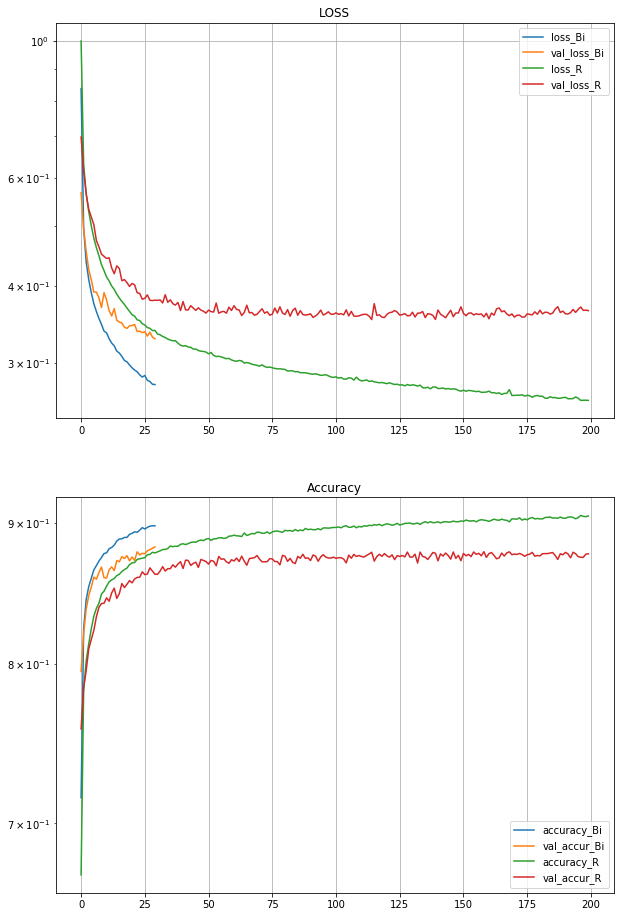

In [0]:
losses_Bi = history_Bi.history['loss']
val_loss_Bi = history_Bi.history['val_loss']
losses_R = history_R.history['loss']
val_loss_R = history_R.history['val_loss']

acc_Bi = history_Bi.history['accuracy']
val_acc_Bi = history_Bi.history['val_accuracy']
acc_R = history_R.history['accuracy']
val_acc_R = history_R.history['val_accuracy']

plt.figure(figsize=(10, 16))
plt.subplot(2, 1, 1)
plt.semilogy(losses_Bi, label='loss_Bi')
plt.semilogy(val_loss_Bi, label='val_loss_Bi')
plt.semilogy(losses_R, label='loss_R')
plt.semilogy(val_loss_R, label='val_loss_R')
plt.grid(True)
plt.legend(loc='best')
plt.title("LOSS")

plt.subplot(2, 1, 2)
plt.semilogy(acc_Bi, label='accuracy_Bi')
plt.semilogy(val_acc_Bi, label='val_accur_Bi')
plt.semilogy(acc_R, label='accuracy_R')
plt.semilogy(val_acc_R, label='val_accur_R')
#plt.ylim(0.8,1)
plt.grid(True)
plt.legend(loc='best')
plt.title("Accuracy")
plt.show()  


## **실습 과제**

### 과제 1. `model_R.fit()`에서 `batch_size=`와 `epochs='값을 조정하여 최적의 값을 찾아 보자
#### -- batch_size 를 32,128,512,1024로 바꾸면서 accuracy값을 비교해 보자 
#### -- 최고의 결과를 낼 batch_size를 예상하고 그 이유를 적어보자 
#### -- 실험 결과와 예상결과를 비교하고, 분석하자 : 



 

### 과제 2. epochs를 30,100,200등으로 바꾸어 보자 
####-- batch_size도 같이 조정하여 최적의 조건을 찾아보자 : 


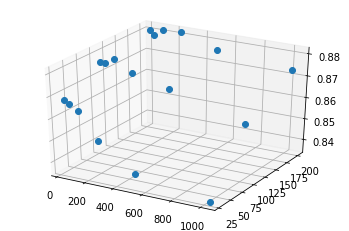

In [0]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['legend.fontsize'] = 10	
fig = plt.figure()
ax = fig.gca(projection='3d')					
x = [32, 32, 32, 64, 64, 64, 128, 128, 128, 256, 256, 256, 512, 512, 512, 1024, 1024, 1024]
y = [30, 100, 200, 30, 100, 200, 30, 100, 200, 30, 100, 200, 30, 100, 200, 30, 100, 200]
z = [0.8684,0.8771,0.8804, 0.8669,0.8768,0.8787,0.8645,0.8796,0.8815,0.8524,0.8747,0.8819,0.8404,0.8705,0.8766,0.8347,0.8609,0.8731]
ax.plot(x, y, z, 'o', label='parametric curve')	